In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('bank-loan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [2]:
bank_data=df[:700]
bank_data.shape
#because after 700 data has to be tested 

(700, 9)

# Missing Value Analysis

In [3]:
bank_data.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x236f1ffdfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x236f2007dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x236f1fefec8>],
 'medians': [<matplotlib.lines.Line2D at 0x236f200dc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x236f200dd88>],
 'means': []}

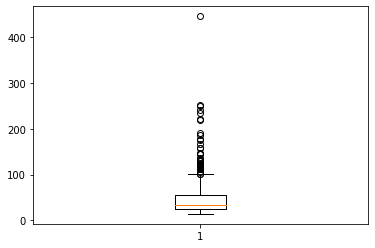

In [5]:
plt.boxplot(bank_data.income)

In [6]:
#save numeric names
cnames = ["age","employ","income","debtinc","creddebt","othdebt"]

In [7]:
for i in cnames:
  print(i)
  q75, q25 = np.percentile(bank_data.loc[:,i], [75 ,25])
     
  iqr = q75 - q25
  min = q25 - (iqr*1.5)
  max = q75 + (iqr*1.5)
  print(min)
  print(max)

  bank_data =bank_data.drop(bank_data[bank_data.loc[:,i] < min].index)
  bank_data =bank_data.drop(bank_data[bank_data.loc[:,i] > max].index)

age
12.5
56.5
employ
-10.5
25.5
income
-19.5
96.5
debtinc
-8.700000000000001
28.1
creddebt
-1.5921015000000003
3.5441745000000004
othdebt
-1.945554
5.758974


In [8]:
bank_data.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

Feature Selection

In [9]:
#generate co relation matrix
df_corr = bank_data.loc[:,cnames]

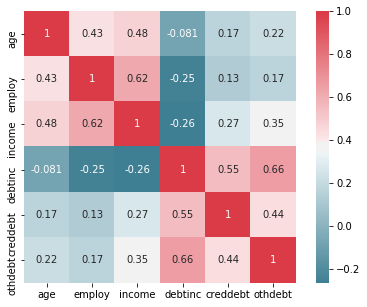

In [10]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), annot=True,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [11]:
#drop irrelevant columns
#since there is only one categorical feature that is default so chi square test of independence not needed to eliminate columns

In [12]:
bank_data.drop(['creddebt','othdebt'],axis=1)
#since these are highly co-related

,age,ed,employ,address,income,debtinc,default
1,27,1,10,6,31,17.3,0.0
2,40,1,15,14,55,5.5,0.0
4,24,2,2,0,28,17.3,1.0
5,41,2,5,5,25,10.2,0.0
7,43,1,12,11,38,3.6,0.0
...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,1.0
696,29,2,6,4,21,11.5,0.0
697,33,1,15,3,32,7.6,0.0
698,45,1,19,22,77,8.4,0.0


# Feature Scaling

In [13]:
df=bank_data.copy()

In [14]:
#normalisation
cnames=['age','employ','income','debtinc','address']

In [15]:
for i in cnames:
    df[i] = pd.to_numeric(df[i], downcast='float')
#changes dtype to float

In [16]:
for i in cnames:
    print(i)
    min = df[i].min()
    max = df[i].max()
    df[i] = (df[i] - min)/( max - min )
df.head()

age
employ
income
debtinc
address


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1,0.200000,1,0.434783,0.193548,0.207317,0.619048,1.362202,4.000798,0.0
2,0.571429,1,0.652174,0.451613,0.500000,0.186813,0.856075,2.168925,0.0
4,0.114286,2,0.086957,0.000000,0.170732,0.619048,1.787436,3.056564,1.0
5,0.600000,2,0.217391,0.161290,0.134146,0.358974,0.392700,2.157300,0.0
7,0.657143,1,0.521739,0.354839,0.292683,0.117216,0.128592,1.239408,0.0


In [17]:
# #Standarisation or z score
for i in cnames: 
    print(i)
    df[i] = (df[i] - df[i].mean())/df[i].std()
    # all columns have been standardised     
       

age
employ
income
debtinc
address


In [18]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1,-0.849590,1,0.613133,-0.237636,-0.201057,1.566168,1.362202,4.000798,0.0
2,0.870611,1,1.544775,1.007285,1.263736,-0.595921,0.856075,2.168925,0.0
4,-1.246560,2,-0.877493,-1.171327,-0.384156,1.566168,1.787436,3.056564,1.0
5,1.002934,2,-0.318508,-0.393251,-0.567255,0.265250,0.392700,2.157300,0.0
7,1.267580,1,0.985790,0.540439,0.226175,-0.944054,0.128592,1.239408,0.0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [20]:
df.groupby('default').mean()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
default,,,,,,,,
0.0,0.094630,1.616667,0.189902,0.106570,0.110357,-0.183397,0.794629,1.816721
1.0,-0.296598,1.805970,-0.595219,-0.334025,-0.345896,0.574823,1.142592,2.107371


In [21]:
notdef=df[df.default==0]
notdef.shape

(420, 9)

In [22]:
deft=df[df.default==1]
deft.shape

(134, 9)

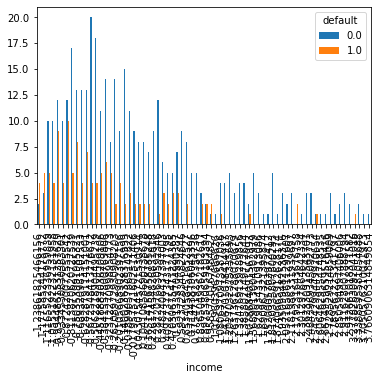

In [23]:
pd.crosstab(df.income,df.default).plot(kind='bar')

# ML Techniques

In [24]:
#Create logistic data. Save target variable first
df_logit = pd.DataFrame(df['default'])

In [25]:
#Add continous variables
df_logit = df_logit.join(df[cnames])

In [26]:
df_logit.head()

,default,age,employ,income,debtinc,address
1,0.0,-0.849590,0.613133,-0.201057,1.566168,-0.237636
2,0.0,0.870611,1.544775,1.263736,-0.595921,1.007285
4,1.0,-1.246560,-0.877493,-0.384156,1.566168,-1.171327
5,0.0,1.002934,-0.318508,-0.567255,0.265250,-0.393251
7,0.0,1.267580,0.985790,0.226175,-0.944054,0.540439


In [27]:
##Create dummies for categorical variables so that different categories in the same label are shown in diff columns clearly
cat_names = ["ed"]

for i in cat_names:
    temp = pd.get_dummies(df[i], prefix = i)
    df_logit =df_logit.join(temp)

In [28]:
df_logit.head()

,default,age,employ,income,debtinc,address,ed_1,ed_2,ed_3,ed_4,ed_5
1,0.0,-0.849590,0.613133,-0.201057,1.566168,-0.237636,1,0,0,0,0
2,0.0,0.870611,1.544775,1.263736,-0.595921,1.007285,1,0,0,0,0
4,1.0,-1.246560,-0.877493,-0.384156,1.566168,-1.171327,0,1,0,0,0
5,0.0,1.002934,-0.318508,-0.567255,0.265250,-0.393251,0,1,0,0,0
7,0.0,1.267580,0.985790,0.226175,-0.944054,0.540439,1,0,0,0,0


In [29]:
df_logit.shape

(554, 11)

# Logistic Regression

In [30]:
#above we have prepared the dataset for logistic regression now test and train 
Sample_Index = np.random.rand(len(df_logit)) < 0.8

train = df_logit[Sample_Index]
test = df_logit[~Sample_Index]
#training the model by creating train annd test data

In [31]:
train.shape

(472, 11)

In [32]:
test.shape

(82, 11)

In [33]:
#select column indexes for independent variables
train_cols = train.columns[1:10]

In [34]:
#Built Logistic Regression
import statsmodels.api as sm
logit = sm.Logit(train['default'], train[train_cols]).fit()
#first target than independent var
logit.summary()
#get summary so that important var and other points can be noted
#comparing with p vaue we get statistically significant var

Optimization terminated successfully.
         Current function value: 0.449494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  472
Model:                          Logit   Df Residuals:                      463
Method:                           MLE   Df Model:                            8
Date:                Wed, 02 Sep 2020   Pseudo R-squ.:                  0.2039
Time:                        17:31:49   Log-Likelihood:                -212.16
converged:                       True   LL-Null:                       -266.52
Covariance Type:            nonrobust   LLR p-value:                 7.016e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1685      0.162      1.042      0.297      -0.148       0.485
employ        -1.0831      0.214     -5.053      0.000      -1.503      -0.663
income         0.1747      0.197      0.886      0.376      -0.212       0.561
debtinc        0.6487      0.123      5.269      0.000       0.407       0.890
address       -0.5529      0.179     -3.094      0.002      -0.903      -0.203
ed_1          -1.5987      0.196     -8.156      0.000      -1.983      -1.214
ed_2          -1.2115      0.230     -5.262      0.000      -1.663      -0.760
ed_3          -1.6838      0.391     -4.307      0.000      -2.450      -0.918
ed_4          -1.7245      0.504     -3.419      0.001      -2.713      -0.736
==============================================================================
"""

In [35]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0
#whereever acualprob is less than 0.5 keep 1(actual val=1) otherwise 0

C:\Users\sachd\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sachd\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sachd\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [36]:
#Build confusion matrix
CM_LR = pd.crosstab(test['default'], test['ActualVal'])
CM_LR

ActualVal,0,1
default,,
0.0,62,5
1.0,9,6


In [53]:
TN = CM_LR.iloc[0,0]
FN = CM_LR.iloc[1,0]
TP = CM_LR.iloc[1,1]
FP = CM_LR.iloc[0,1]
ACCURACY=((TP+TN)*100)/(TP+TN+FP+FN)
ACCURACY


82.92682926829268

In [54]:
#False Negative rate 
(FN*100)/(FN+TP)

60.0

Logistic Regression Binary

In [38]:
x=df_logit
y=df.default
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.2)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)*100

99.77477477477478

Decision Tree Classification

In [40]:
#replace target categories with Yes or No
df['default'] = df['default'].replace(0, 'No')
df['default'] = df['default'].replace(1, 'Yes')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1,-0.849590,1,0.613133,-0.237636,-0.201057,1.566168,1.362202,4.000798,No
2,0.870611,1,1.544775,1.007285,1.263736,-0.595921,0.856075,2.168925,No
4,-1.246560,2,-0.877493,-1.171327,-0.384156,1.566168,1.787436,3.056564,Yes
5,1.002934,2,-0.318508,-0.393251,-0.567255,0.265250,0.392700,2.157300,No
7,1.267580,1,0.985790,0.540439,0.226175,-0.944054,0.128592,1.239408,No


In [41]:
#Divide data into train and test
X = df.values[:, 0:7]
#all rows and 7 independent variables are taken above
Y = df.values[:,8]
#all rows and target column default is taken here
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [42]:
#Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [43]:
clf.predict(X_test)

array(['No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'Yes'], dtype=object)

In [44]:
clf.score(X_test,y_test)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)*100

68.46846846846847

Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [46]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [47]:
y_pred=NB_model.predict(X_test)
accuracy_score(y_test,NB_Predictions )*100

79.27927927927928

Random Forest

In [48]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1,-0.849590,1,0.613133,-0.237636,-0.201057,1.566168,1.362202,4.000798,No
2,0.870611,1,1.544775,1.007285,1.263736,-0.595921,0.856075,2.168925,No
4,-1.246560,2,-0.877493,-1.171327,-0.384156,1.566168,1.787436,3.056564,Yes
5,1.002934,2,-0.318508,-0.393251,-0.567255,0.265250,0.392700,2.157300,No
7,1.267580,1,0.985790,0.540439,0.226175,-0.944054,0.128592,1.239408,No


In [49]:
from sklearn.ensemble import RandomForestClassifier
X = df.values[:, 0:7]
#all rows and 7 independent variables are taken above
Y = df.values[:,8]
#all rows and target column default is taken here
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

model = RandomForestClassifier(n_estimators = 10).fit(X_train, y_train)

In [50]:
y_pred=model.predict(X_test)

In [51]:
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred )*100

78.37837837837837

Clearly Logistic Regression gives the best accuracy in this case.